# Importing the necessary modules

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os

### Visualising the image

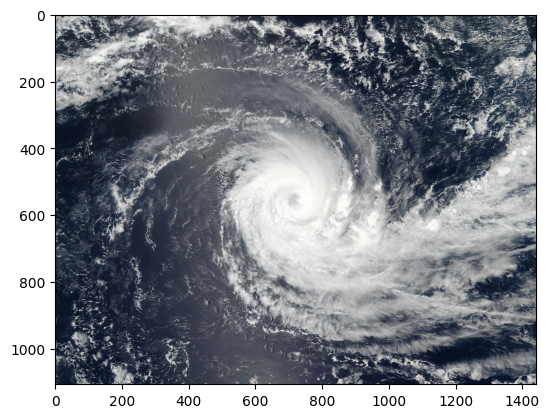

In [2]:
img = image.load_img("Data/Cyclone/0.jpg")
plt.imshow(img)

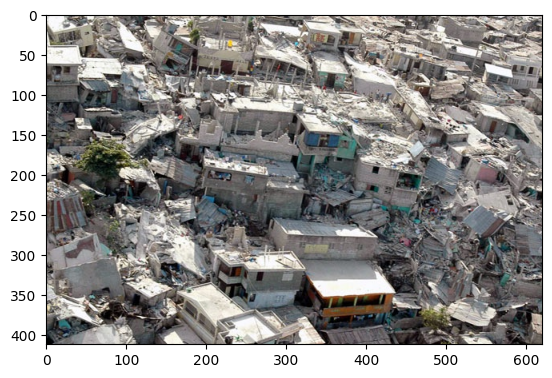

In [3]:
img = image.load_img("Data/Earthquake/0.jpg")
plt.imshow(img)

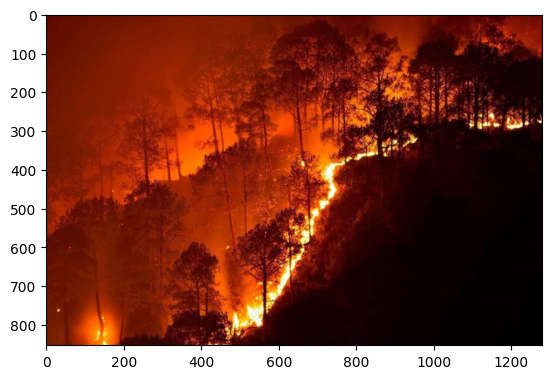

In [4]:
img = image.load_img("Data/Wildfire/0.jpg")
plt.imshow(img)

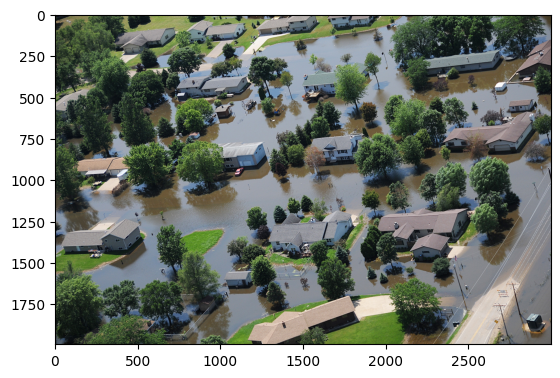

In [5]:
img = image.load_img("Data/Flood/0.jpg")
plt.imshow(img)

## Reading the Image

In [6]:
# pic is in the form of RGB channel
cv2.imread("Data/Cyclone/0.jpg")
# to see the shape
cv2.imread("Data/Cyclone/0.jpg").shape
# it shows 1107 pixel height and 1440 pixel width and 3 RGB channels

(1107, 1440, 3)

### Rescaling the image

In [7]:
# initiated two classes for training
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

## Generating the Labels for images 

In [8]:
# for generating labels flow_from_directory function is used
train_dataset = train.flow_from_directory("Data/",
                                         target_size=(200,200),
                                         batch_size=100,
                                         class_mode="categorical")
validation_dataset = validation.flow_from_directory("Data/",
                                                   target_size=(200,200),
                                                   batch_size=100,
                                                   class_mode="categorical")

Found 4428 images belonging to 4 classes.
Found 4428 images belonging to 4 classes.


In [9]:
# to see the labels
train_dataset.class_indices
# validation_dataset.class_indices
# train_dataset.classes

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'Wildfire': 3}

## Training the model

In [10]:
# train the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),

                                   tf.keras.layers.Dense(512,activation='relu'),

                                   tf.keras.layers.Dense(4,activation='sigmoid')
                                  ])

C:\Users\Priya_Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model 

In [11]:
# compiling the model
model.compile(loss="binary_crossentropy",optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

## Fitting the model 

In [15]:
# fiting the model
model_fit = model.fit(train_dataset,
                     steps_per_epoch=5,
                     epochs=30,
                     validation_data=validation_dataset)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 100s 22s/step - accuracy: 0.7444 - loss: 0.3002 - val_accuracy: 0.7545 - val_loss: 0.2843
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.6819 - loss: 0.3465 - val_accuracy: 0.7543 - val_loss: 0.2981
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 76s 19s/step - accuracy: 0.7657 - loss: 0.2746 - val_accuracy: 0.7706 - val_loss: 0.2770
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.7952 - loss: 0.2633 - val_accuracy: 0.6484 - val_loss: 0.3776
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step - accuracy: 0.7329 - loss: 0.3205 - val_accuracy: 0.7864 - val_loss: 0.2661
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 71s 17s/step - accuracy: 0.7748 - loss: 0.3101 - val_accuracy: 0.7581 - val_loss: 0.2801
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 17s/step - accuracy: 0.7395 - loss: 0.2971 - val_accuracy: 0.7710 - val_loss: 0.2860
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 73s 18s/step - accuracy: 0.7341 - loss: 0.2946 - val_accuracy: 0.7839 - val_loss: 0.2695

In [16]:
validation_dataset.class_indices     

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'Wildfire': 3}

## Testing the model

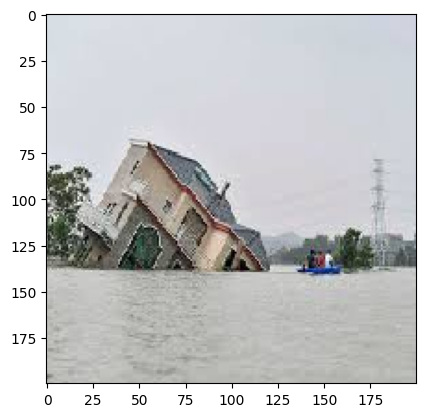

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Cyclone


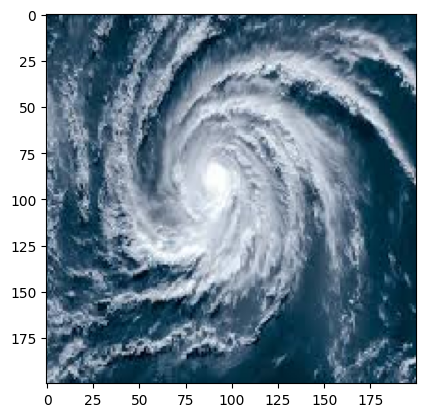

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cyclone


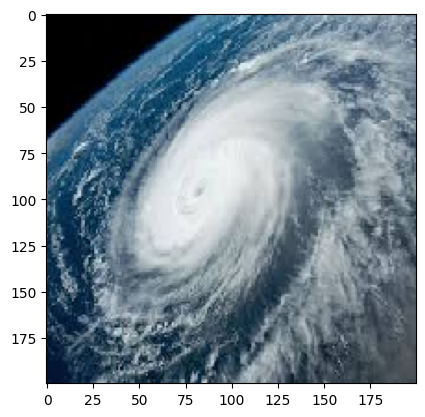

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Cyclone


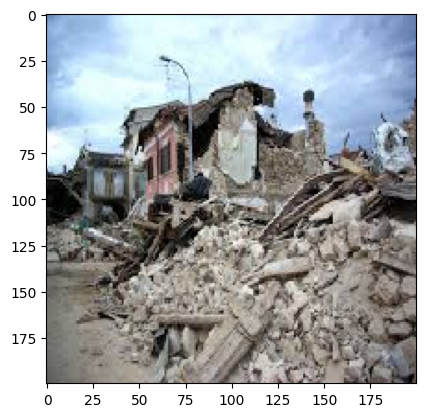

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Earthquake


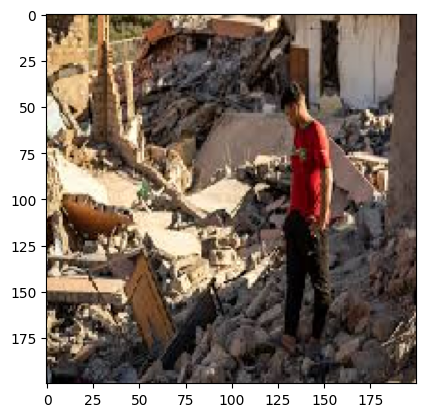

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Earthquake


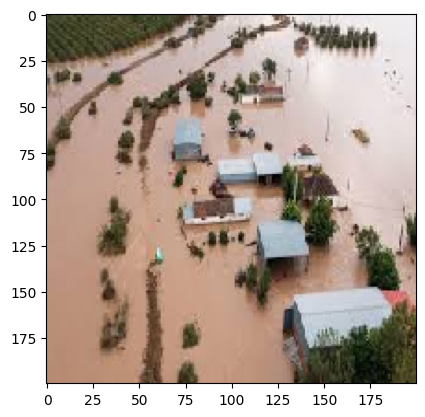

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Flood


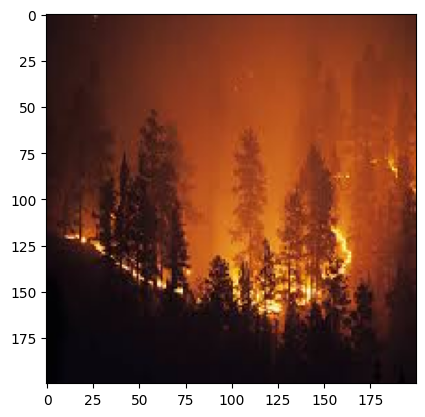

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Wildfire


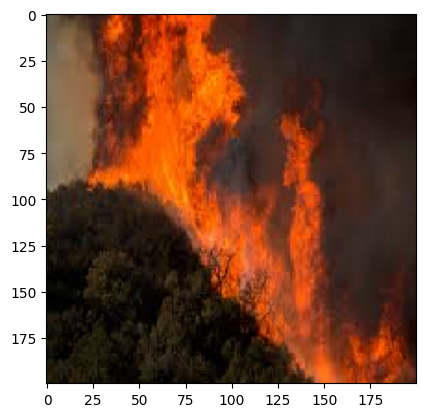

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Wildfire


In [20]:
# testing on data

for i in os.listdir("test/"):
    img = image.load_img("test/"+i, target_size=(200, 200, 3))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])  
    val = model.predict(images)

    # Assuming the model outputs probabilities for each class (one-hot encoded)
    predicted_class = np.argmax(val)  # Get the index of the highest probability

    if predicted_class == 0:
        print("Cyclone")
    elif predicted_class == 1:
        print("Earthquake")
    elif predicted_class == 2:
        print("Flood")
    else:
        print("Wildfire")

In [21]:
model.save("disaster_image_classification_model.h5")

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      17,334,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,720,842 (132.45 MB)

 Trainable params: 17,360,420 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,360,422 (66.22 MB)